In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('mldata.csv')
df.head()

,age,height,weight,gender,likeness
0,27,170.688,76.0,Male,Biryani
1,41,165.000,70.0,Male,Biryani
2,29,171.000,80.0,Male,Biryani
3,27,173.000,102.0,Male,Biryani
4,29,164.000,67.0,Male,Biryani


In [2]:
df['gender']=df['gender'].replace('Male',1)
df['gender']=df['gender'].replace('Female',0)

df.head()

,age,height,weight,gender,likeness
0,27,170.688,76.0,1,Biryani
1,41,165.000,70.0,1,Biryani
2,29,171.000,80.0,1,Biryani
3,27,173.000,102.0,1,Biryani
4,29,164.000,67.0,1,Biryani


In [3]:
X = df[['age','height','weight','gender']]

y = df['likeness']

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df.drop('likeness', axis=1))

scaled_features = scaler.transform(df.drop('likeness', axis=1))

scaled_data = pd.DataFrame(scaled_features, columns = df.drop('likeness', axis=1).columns)

In [11]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier().fit (X,y)

model.predict([[23,150,64,1]])

C:\Users\AI\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Samosa'], dtype=object)

In [19]:
# how to measure the accuracy of our model   (this can be used on SLR OR MLR)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#create model

model = DecisionTreeClassifier().fit(X_train,y_train)

predic_value = model.predict(X_test)
predic_value

#checking score
# y_test = actual values

score = accuracy_score(y_test,predic_value)*100
score

46.93877551020408

In [7]:
# how to save and train your model


import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import joblib

model = DecisionTreeClassifier().fit(X,y)
joblib.dump(model, 'foodie.joblib')


['foodie.joblib']

## Export your model to a dot file


In [8]:
# graph

from enum import unique
from sklearn import tree

model = DecisionTreeClassifier().fit(X, y)
# graphic evaluation

fig = tree.export_graphviz(model,
                    out_file='foodie.dot',
                    feature_names=['age','height','weight','gender'],
                    class_names=sorted(y.unique()),
                    label='all', 
                    rounded=True,
                    filled=True)



# Anotherway to plot decision tree

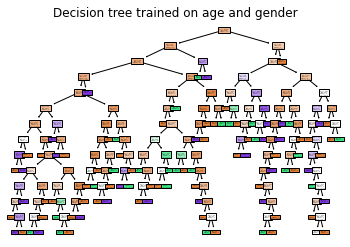

<Figure size 432x288 with 0 Axes>

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


model = DecisionTreeClassifier().fit(X,y)

plot_tree(model,filled=True)
plt.title('Decision tree trained on age and gender')
plt.figure()  
plt.show()
#plt.savefig('tree_high_dpi', dpi=100)
